# Computational Statistics 
# TP 4 : Improve the Metropolis-Hastings algorithm

## Exercice 1 : Adaptive Metropolis-Hastings within Gibbs sampler

### 1.A – Metropolis-Hastings within Gibbs sampler
#### Question 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
from scipy.stats import invgamma

In [ ]:
#Target distribution
def pi(x,y,a):
  return np.exp((-(x/a)**2-y**2-(1/4)*(((x/a)**2-y**2)**2)))

#Simulation P1
def P1_sample(x0, y0, a, sigma):
  X = np.random.normal(x0, sigma[0],size=1)[0]
  alpha = min(1, pi(X, y0, a)/pi(x0, y0, a))
  U = np.random.rand()

  if U <= alpha: #On accepte
    return X, y0, 1
  else: #On rejette
    return x0, y0, 0


#Simulation P2
def P2_sample(x0, y0, a, sigma) :
  Y = np.random.normal(y0, sigma[0],size=1)[0]
  alpha = min(1, pi(x0, Y, a)/pi(x0, y0, a))
  U = np.random.rand()

  if U <= alpha: #On accepte
    return x0, Y, 1
  else: #On rejette
    return x0, y0, 0


#Simulation noyau de transition P
def P_sample(x0, y0, a, p, sigma, N):
  P = np.zeros((N,2))
  P[0,:] = [x0,y0]

  #Variables pour le taux d'acceptation de x et y
  ar_x = []
  a_x = 0
  ar_y = []
  a_y = 0

  for i in range(1,N):
    U = np.random.uniform()
    if U <= p:
      x, y, incr1 = P1_sample(P[i-1,0], P[i-1,1], a, sigma)
      P[i,:] = [x,y]
      a_x += incr1
    else:
      x, y, incr2 = P2_sample(P[i-1,0], P[i-1,1], a, sigma)
      P[i,:] = [x,y]
      a_y += incr2
    
    #On fait des mesures du taux d'acceptation sur des paquets de 50 echantillons
    if i % 50 == 0:
      ar_x.append(a_x / 50)
      ar_y.append(a_y / 50)
      a_x = 0
      a_y = 0
  return P, ar_x, ar_y



#### Question 2

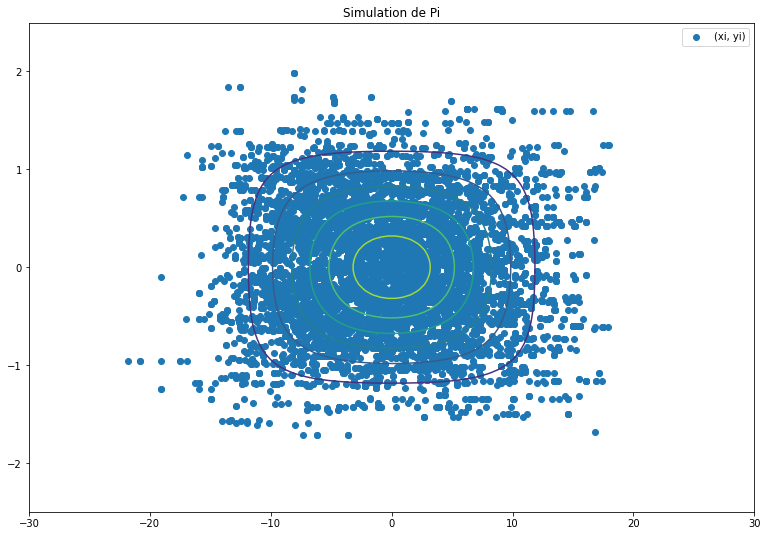

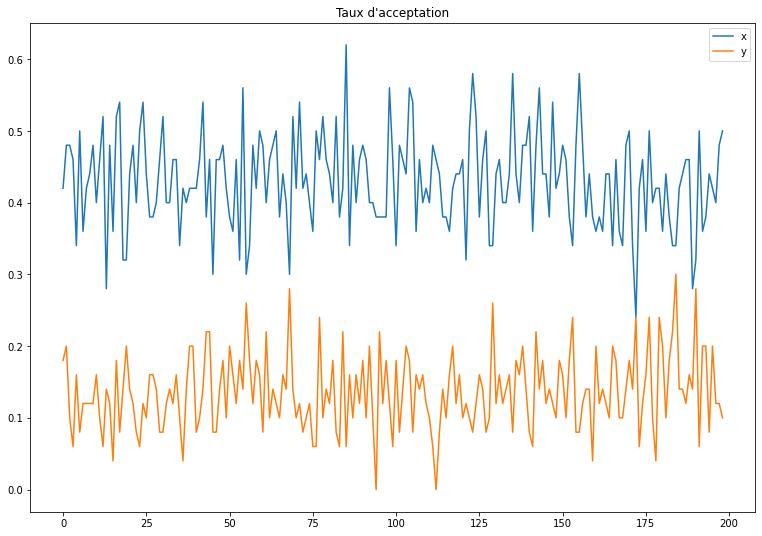

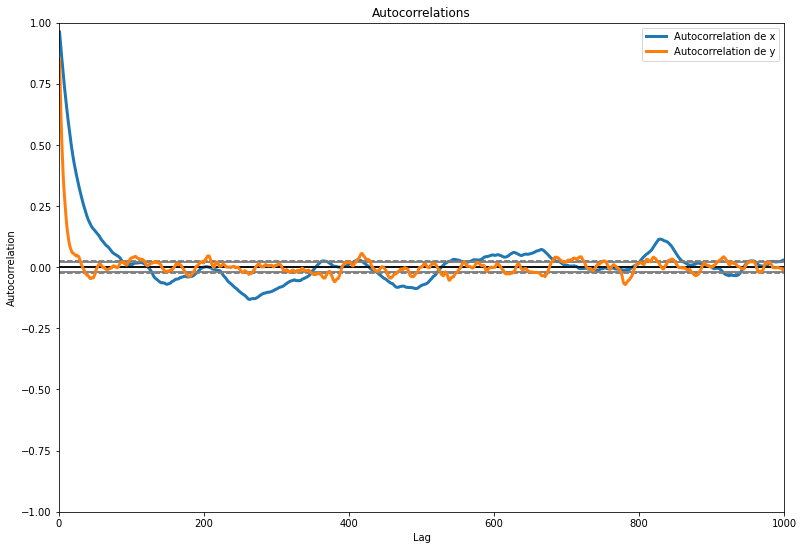

In [ ]:
#Simulation du noyau de transition
P, ar_x, ar_y = P_sample(0, 0, 10, 1/2, [3,3], 10000)

#On trace la target distribution
x = np.linspace(-30, 30 ,100)
y = np.linspace(-2.5, 2.5, 100)
X, Y = np.meshgrid(x, y)
Z = pi(X, Y, 10).reshape(X.shape)

#Representation de l'echantillon
plt.figure(figsize=(13,9))
plt.contour(X, Y, Z)
plt.scatter(P[:,0], P[:,1] , label = '(xi, yi)')
plt.title('Simulation de Pi')
plt.legend()
plt.show()

#Graphique du taux d'acceptation
plt.figure(figsize=(13,9))
plt.plot(ar_x , label = 'x')
plt.plot(ar_y , label = 'y')
plt.legend()
plt.title("Taux d'acceptation")
plt.show()

#Graphique autocorrelation de x et y
plt.figure(figsize=(13,9))
pd.plotting.autocorrelation_plot(P[:,0], label='Autocorrelation de x', linewidth=3)
pd.plotting.autocorrelation_plot(P[:,1], label = 'Autocorrelation de y', linewidth=3)
plt.xlim((0,1000))
plt.title("Autocorrelations")
plt.show()

On remarque d'après le graphique ci-dessus que l'algorithme n'est pas très performant car les échantillons simulés ne sont pas contenues dans les lignes de niveau i.e ils ne reflètent pas des réalisations de la target distribution $\pi$. De plus, le taux d'acceptation de x et de y n'oscille pas proche de $0.24$ (valeur annoncé en séance de TP). Enfin, l'autocorrélation de x n'est pas très stable autour de 0.

#### Question 3

**1ère méthode :**  une première méthode simple consiste à modifier la variance $\sigma$ qu'on avait choisi au départ, cela permettra de contrôler la dispersion de nos échantillons et de modifier le comportement de l'autocorrelation. Prenons par exemple $\sigma = (6,3)$ :

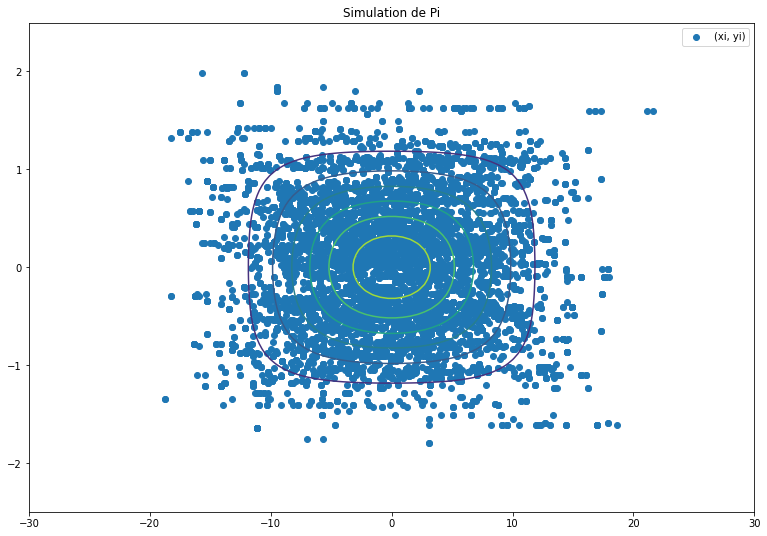

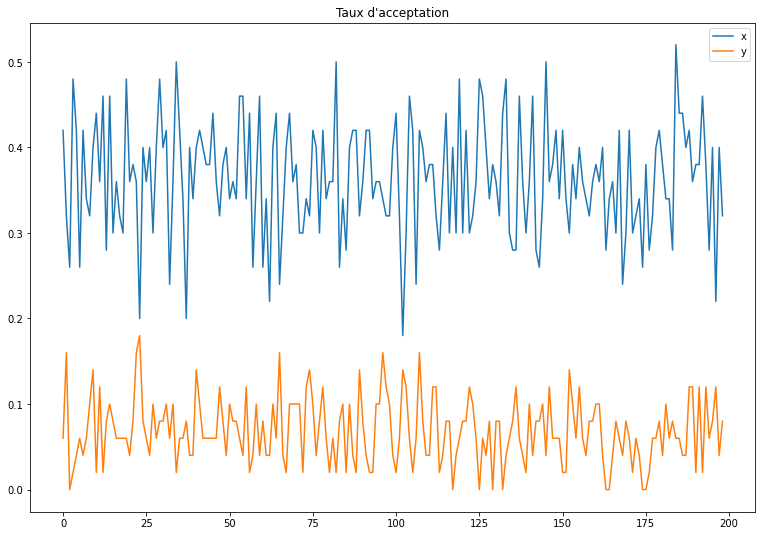

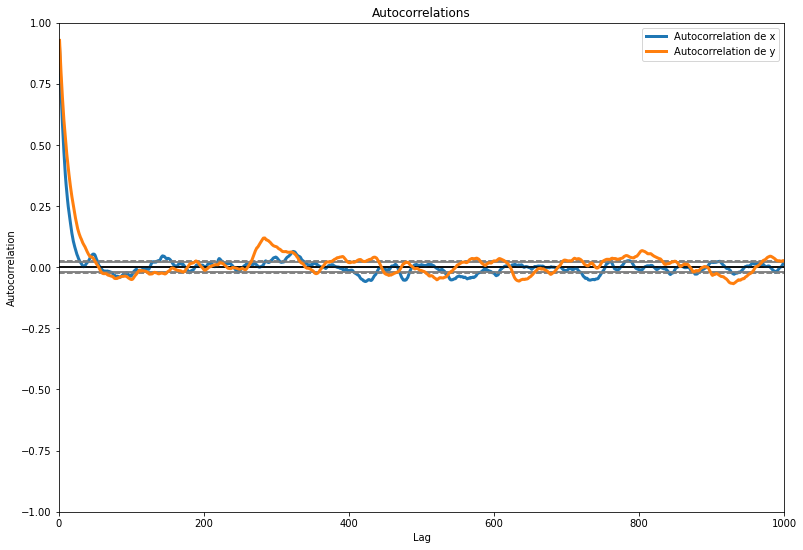

In [ ]:
#Simulation du noyau de transition
P, ar_x, ar_y = P_sample(0, 0, 10, 0.5, [6,3], 10000)

#On trace la target distribution
x = np.linspace(-30, 30 ,100)
y = np.linspace(-2.5, 2.5, 100)
X, Y = np.meshgrid(x, y)
Z = pi(X, Y, 10).reshape(X.shape)

#Representation de l'echantillon
plt.figure(figsize=(13,9))
plt.contour(X, Y, Z)
plt.scatter(P[:,0], P[:,1] , label = '(xi, yi)')
plt.title('Simulation de Pi')
plt.legend()
plt.show()

#Graphique du taux d'acceptation
plt.figure(figsize=(13,9))
plt.plot(ar_x , label = 'x')
plt.plot(ar_y , label = 'y')
plt.legend()
plt.title("Taux d'acceptation")
plt.show()

#Graphique autocorrelation de x et y
plt.figure(figsize=(13,9))
pd.plotting.autocorrelation_plot(P[:,0], label='Autocorrelation de x', linewidth=3)
pd.plotting.autocorrelation_plot(P[:,1], label = 'Autocorrelation de y', linewidth=3)
plt.xlim((0,1000))
plt.title("Autocorrelations")
plt.show()

On remarque que le comportement du taux d'acceptation de x et de y ne semble pas avoir changé considérablement mais l'autocorrélation de x semble se stabiliser plus rapidement vers 0 (de même pour celle de y).

**2ème méthode :** une deuxième méthode consiste à jouer sur la probabilité de réalisation de P1 donc de changer la composante x; on choisit alors $p=0.7$.

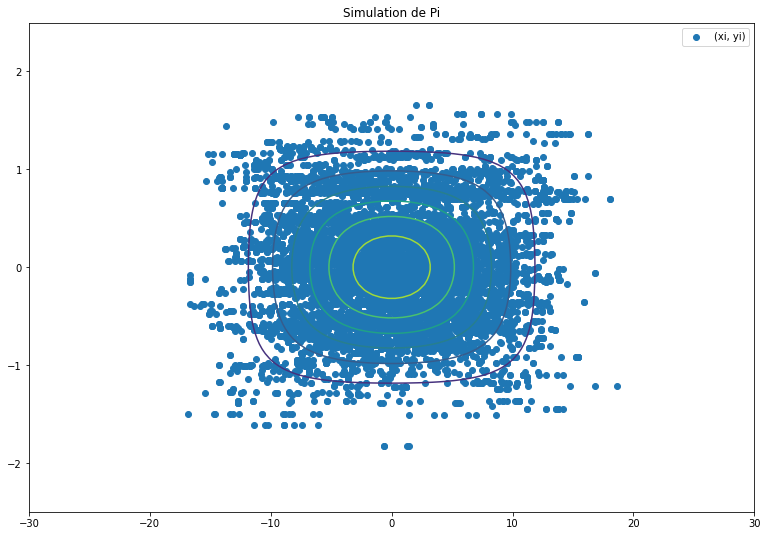

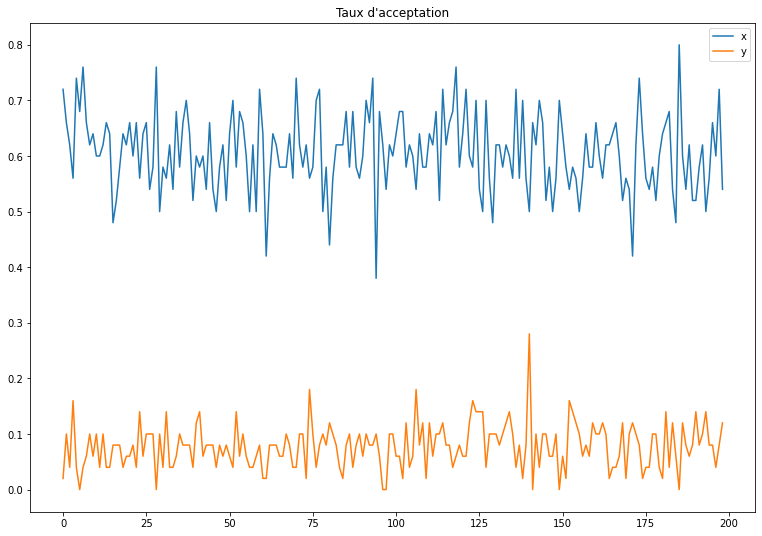

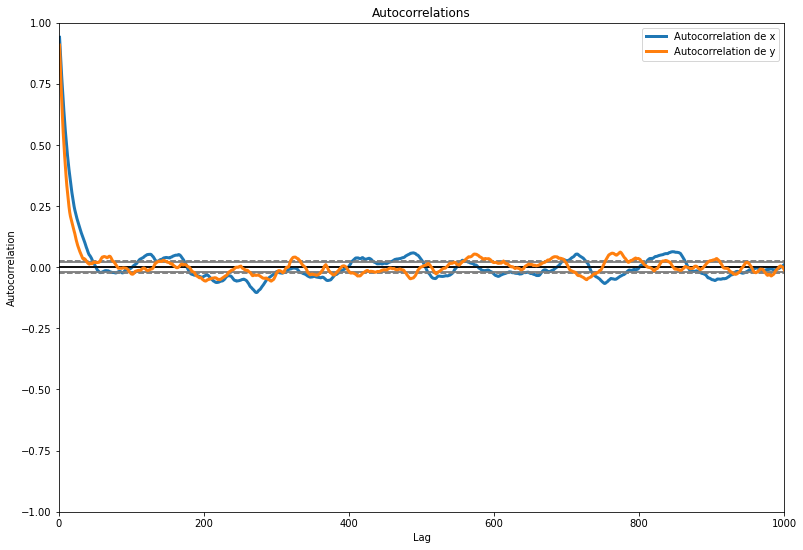

In [ ]:
#Simulation du noyau de transition
P, ar_x, ar_y = P_sample(0, 0, 10, 0.7, [3,3], 10000)

#On trace la target distribution
x = np.linspace(-30, 30 ,100)
y = np.linspace(-2.5, 2.5, 100)
X, Y = np.meshgrid(x, y)
Z = pi(X, Y, 10).reshape(X.shape)

#Representation de l'echantillon
plt.figure(figsize=(13,9))
plt.contour(X, Y, Z)
plt.scatter(P[:,0], P[:,1] , label = '(xi, yi)')
plt.title('Simulation de Pi')
plt.legend()
plt.show()

#Graphique du taux d'acceptation
plt.figure(figsize=(13,9))
plt.plot(ar_x , label = 'x')
plt.plot(ar_y , label = 'y')
plt.legend()
plt.title("Taux d'acceptation")
plt.show()

#Graphique autocorrelation de x et y
plt.figure(figsize=(13,9))
pd.plotting.autocorrelation_plot(P[:,0], label='Autocorrelation de x', linewidth=3)
pd.plotting.autocorrelation_plot(P[:,1], label = 'Autocorrelation de y', linewidth=3)
plt.xlim((0,1000))
plt.title("Autocorrelations")
plt.show()

On remarque ainsi que le taux d'acceptation de x et de y s'éloigne de $0.24$ mais on s'y attendait car il est normal d'avoir un taux d'acceptation de x nettement plus important que celui de y. Ici, on remarque que l'autocorrélation se stabilise rapidement autour de 0, elle a un meilleure comportement que l'autocorrélation qu'on avait au départ mais un moins bon que la première méthode.

On comprends bien dans cette première partie que comme indiqué dans l'énoncé, il est compliqué de choisir les meilleurs paramètres qui permettront d'avoir une bonne performance de cette algorithme MCMC. C'est pourquoi on doit se tourner vers l'algorithme "Adaptive Metropolis-Hastings".

### 1.B – Adaptive Metropolis-Hastings within Gibbs sampler
#### Question 1

In [ ]:
#The adaptative Metropolis-Hastings within Gibbs sampler
def adaptative_MH(x0, y0, a, p, N):
  P = np.zeros((N,2))
  P[0,:] = [x0,y0]

  #Variables pour le taux d'acceptation de x et y
  ar_x = []
  a_x = 0
  ar_y = []
  a_y = 0

  #log-sigma
  l = [0,0]

  #Numero du batch
  j = 1

  for i in range(1,N):
    U = np.random.uniform()
    sigma = [np.exp(l[0]), np.exp(l[1])]
    if U <= p:
      x, y, incr1 = P1_sample(P[i-1,0], P[i-1,1], a, sigma)
      P[i,:] = [x,y]
      a_x += incr1
    else:
      x, y, incr2 = P2_sample(P[i-1,0], P[i-1,1], a, sigma)
      P[i,:] = [x,y]
      a_y += incr2

    #Si on est a la fin d'un batch de 50 iterations
    if i % 50 == 0:
      delta_j = min(0.01, 1/np.sqrt(j))  

      #On modifie les li en consequence
      if a_x / 50 > 0.24 :
        l[0] += delta_j    
      else: 
        l[0] -= delta_j
      
      if a_y / 50 > 0.24 :
        l[1] += delta_j    
      else: 
        l[1] -= delta_j

      j += 1
      
      ar_x.append(a_x / 50)
      ar_y.append(a_y / 50)
      a_x = 0
      a_y = 0
  
  return P, ar_x, ar_y


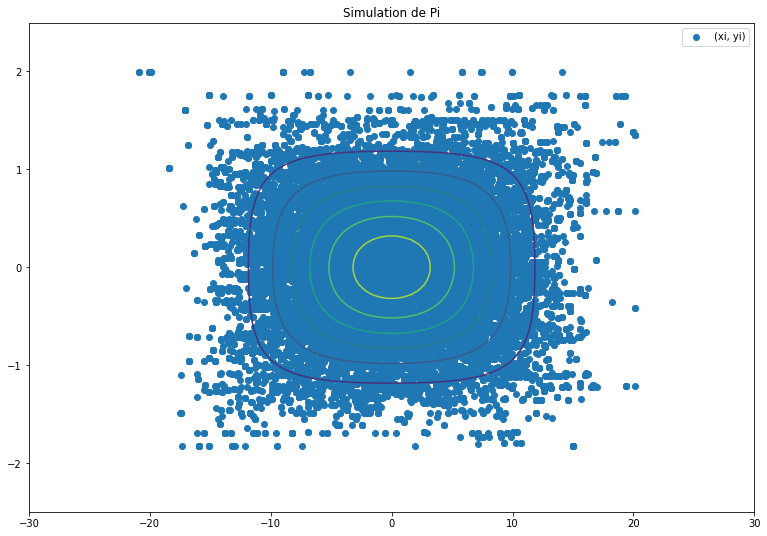

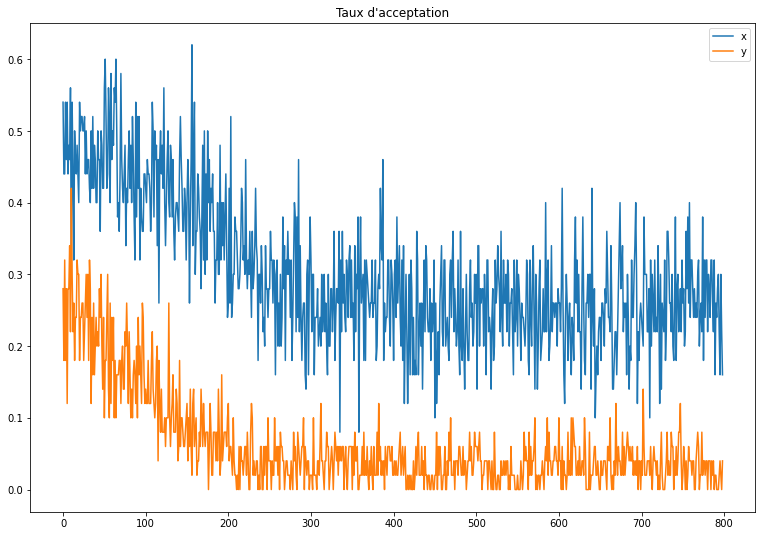

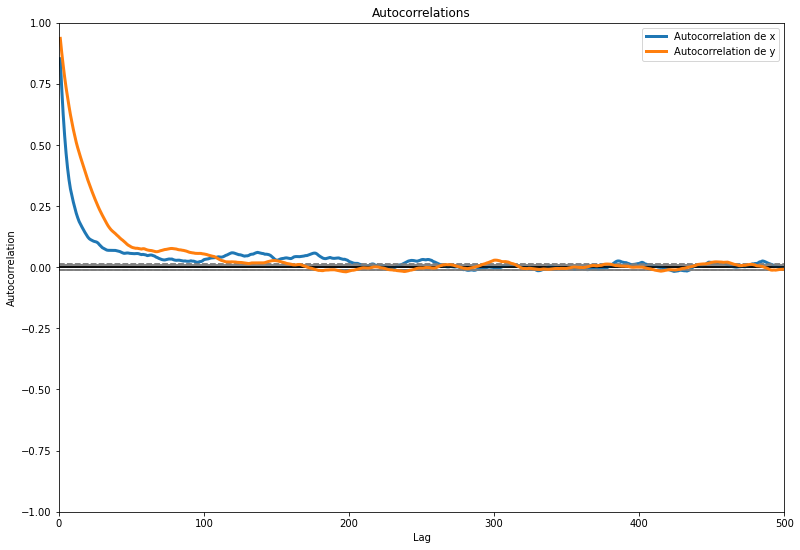

In [ ]:
#Simulation du noyau de transition
P, ar_x, ar_y = adaptative_MH(0, 0, 10, 1/2, 40000)

#On trace la target distribution
x = np.linspace(-30, 30 ,100)
y = np.linspace(-2.5, 2.5, 100)
X, Y = np.meshgrid(x, y)
Z = pi(X, Y, 10).reshape(X.shape)

#Representation de l'echantillon
plt.figure(figsize=(13,9))
plt.contour(X, Y, Z)
plt.scatter(P[:,0], P[:,1] , label = '(xi, yi)')
plt.title('Simulation de Pi')
plt.legend()
plt.show()

#Graphique du taux d'acceptation
plt.figure(figsize=(13,9))
plt.plot(ar_x , label = 'x')
plt.plot(ar_y , label = 'y')
plt.legend()
plt.title("Taux d'acceptation")
plt.show()

#Graphique autocorrelation de x et y
plt.figure(figsize=(13,9))
pd.plotting.autocorrelation_plot(P[:,0], label='Autocorrelation de x', linewidth=3)
pd.plotting.autocorrelation_plot(P[:,1], label = 'Autocorrelation de y', linewidth=3)
plt.xlim((0,500))
plt.title("Autocorrelations")
plt.show()

Pour comparer cette nouvelle méthode avec celle de la partie A, on a pris cette fois plus d'itérations, $N=40000$, pour bien observer la différence de résultats de l'algorithme "Adaptative MH" sur nos échantillons. En effet, on remarque que le taux d'acceptation de x et y est considérablement plus proche de $0.24$ que dans la partie A. De plus, on observe une autocorrélation de x et de y beaucoup plus stable autour de 0 donc qui converge plus rapidement.

On en conclut alors que la méthode avec adaptation est bien meilleure que celle sans adaptation car on a un taux d'acceptation très proche de $0.24$ et surtout on a une autocorrélation proche de 0 ce qui signifie que nos échantillons sont simulés de façon aléatoire.

#### Question 2

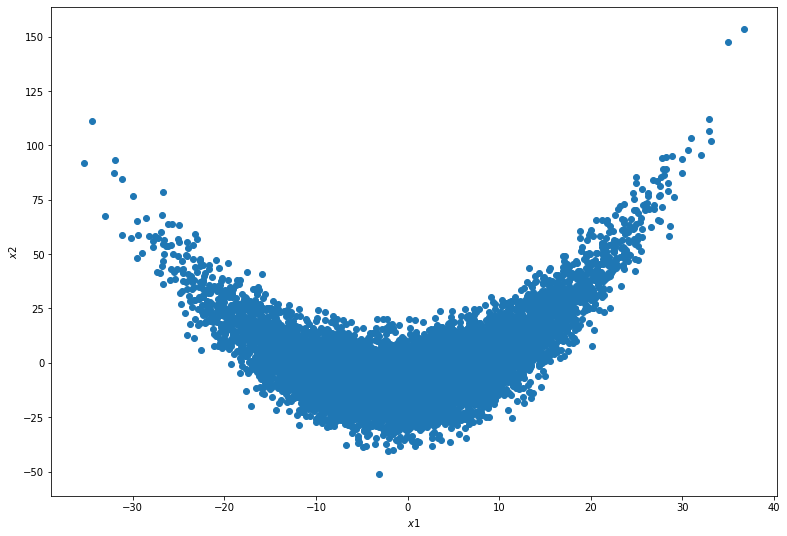

In [ ]:
#Je reprends mon code similaire dans la fin du TP2
d = 20
B = 0.1
sigma = np.array(pd.read_csv('tmalaexcov.txt' , header=None, sep=' '))

sample = np.random.multivariate_normal(np.zeros(d), sigma**2, 10000)
sample[:,1] = sample[:,1] + B*(sample[:,0]**2 - sigma[0,0]**2)

plt.figure(figsize=(13,9))
plt.scatter(sample[:,0], sample[:,1])
plt.xlabel('$x1$')
plt.ylabel('$x2$')
plt.show()

In [ ]:
#Banana density
def banana(x, B):
    return np.exp(-((x[0]**2) / 200) - (0.5) * (x[1] + B * x[0]**2 - 100 * B)**2 - (0.5) * (np.sum(x[2:]**2)))


def adaptative_MH_banana(x0, B, d, N):
  P = np.zeros((N,d))
  P[0,:] = x0
  a_x = np.zeros(d)
  l = np.zeros(d)
  j = 1
    
  for i in range(1,N):  
    k = np.random.randint(d) #On choisit la k-ieme coordonnee      
    x = copy.deepcopy(P[i-1,:]) #Pour eviter les problemes de copie
    x[k] = np.random.normal(P[i-1,k], np.exp(l[k]))
        
    alpha = min(1, banana(x, B) / banana(P[i-1,:], B))
    U = np.random.rand()
        
    if U <= alpha : #On accepte
      P[i,:] = x
      a_x[k] += 1
    else: #On rejette
      P[i,:] = P[i-1,:] 
           
    #On prend des batchs de 1000 car on a plus de data
    if (i % 1000 == 0) : 
      delta_j = min(0.01, 1/np.sqrt(j)) 
      for k in range(d) : 
        if a_x[k] / 1000 > 0.24 :
          l[k] += delta_j    
        else: 
          l[k] -= delta_j
      a_x = np.zeros(d)
      j += 1

    return P

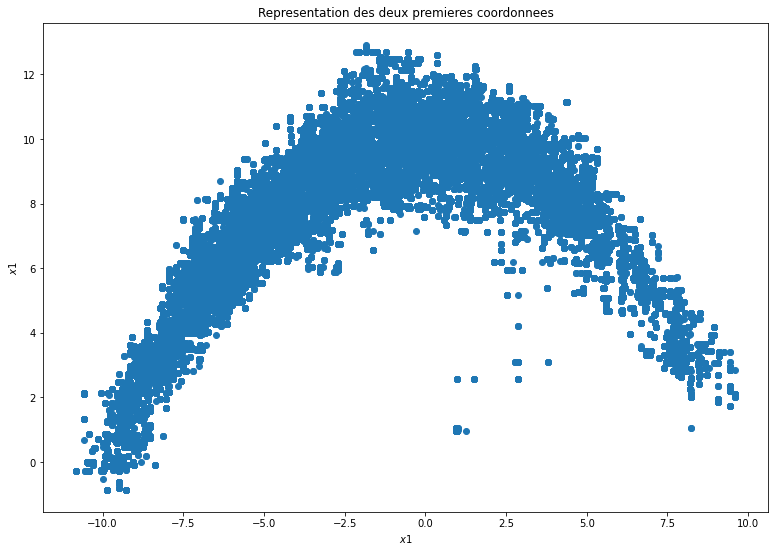

In [ ]:
P = adaptative_MH_banana(np.ones(d), B, d, 100000)

plt.figure(figsize=(13,9))
plt.scatter(P[:,0], P[:,1])
plt.xlabel('$x1$')
plt.ylabel('$x1$')
plt.title('Representation des deux premieres coordonnees')
plt.show()


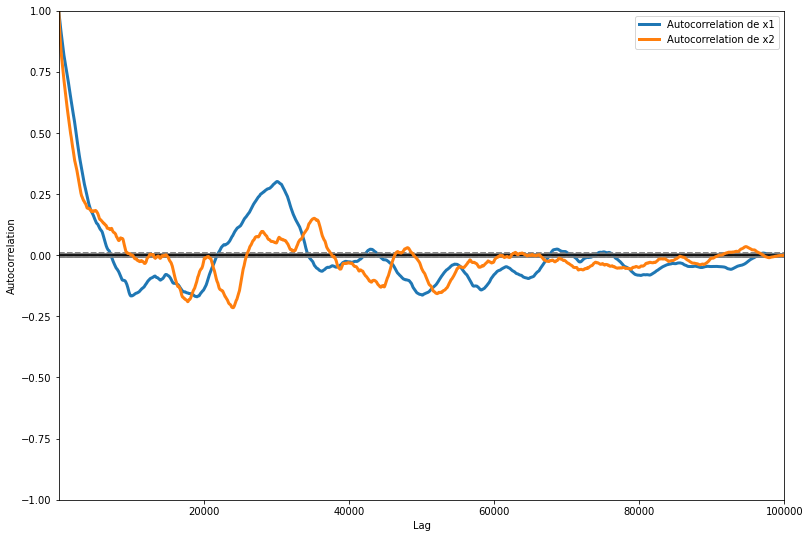

In [ ]:
#Graphique autocorrelation
plt.figure(figsize=(13,9))
pd.plotting.autocorrelation_plot(P[:,0], label='Autocorrelation de x1',linewidth=3)
pd.plotting.autocorrelation_plot(P[:,1], label = 'Autocorrelation de x2',linewidth=3)

plt.show()

D'après les graphiques précèdents, on remarque que lorsqu'on représente les deux premières coordonnées de nos échantillons simulées, cela donne bien la forme d'une banane. Cependant, au niveau de l'autocorrelation de ces deux premières coordonnées, on remarque que l'autocorrelation demande beaucoup d'itérations avant de se stabiliser vers 0 donc nos réalisations de sont pas simulées de façon totalement aléatoire.

La complexité de la forme de la densité ainsi qu'une dimension importante peuvent peut-être expliqué la performance de notre algorithme adaptatif en comparaison avec nos résultats précèdents.

## Exercice 2 : Sampling from multimodal distributions

### 2.A – A toy example
#### Question 1

In [ ]:
# Target distribution 
def pi(x, w, mu, sigma, N): 
  S = 0
  for i in range(N):
    S += w[i] / (2 * np.pi * sigma[i]**2) * np.exp(-(x - mu[i,:]).T.dot(x - mu[i,:])/(2 * sigma[i]**2))
  return S

#Metropolis-Hastings Symmetric Random Walk algorithm
def MH(x0, w, mu, sigma, N, N_pi = 20):
  P = np.zeros((N,2))
  P[0,:] = x0
    
  for i in range(1,N):
    #Premiere coordonnee
    x = np.random.normal(P[i-1,0],1)
    X = np.array([x , P[i-1,1]])
        
    alpha = min(1, pi(X, w, mu, sigma, N_pi) / pi(P[i-1,:], w, mu, sigma, N_pi))
    U = np.random.rand()
    
    if U <= alpha: #On accepte
        P[i,0] = x
    else: #On rejette
        P[i,0] = P[i-1,0]          

    #Deuxieme coordonnee
    y = np.random.normal(P[i-1,1],1)
    Y = np.array([P[i,0] , y])
    
    alpha = min(1, pi(Y, w, mu, sigma, N_pi) / pi(P[i-1,:], w, mu, sigma, N_pi))
    U = np.random.rand()
    
    if U <= alpha: #On accepte
        P[i,1] = y
    else: #On rejette
        P[i,1] = P[i-1,1]         

  return P 


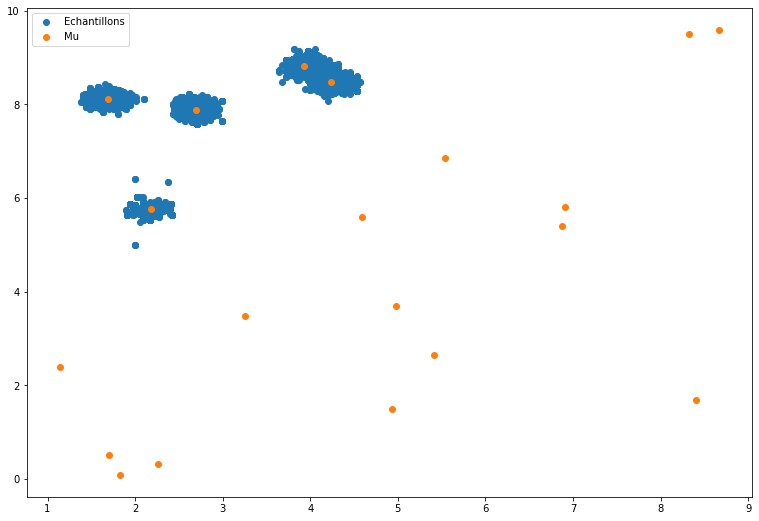

In [ ]:
N_pi = 20
x0 = np.array([2,5])
w = np.ones(N_pi) * 0.05
mu = np.array([[2.18,5.76],[8.67,9.59],[4.24,8.48],[8.41,1.68],[3.93,8.82],[3.25,3.47],[1.70,0.50],[4.59,5.60],[6.91,5.81],[6.87,5.40],[5.41,2.65],[2.70,7.88],[4.98,3.70],[1.14,2.39],[8.33,9.50],[4.93,1.50],[1.83,0.09],[2.26,0.31],[5.54,6.86],[1.69,8.11]])
sigma = np.ones(N_pi) * 0.1
P = MH(x0, w, mu, sigma, N=10000)
      
plt.figure(figsize=(13,9))
plt.scatter(P[:,0],P[:,1] , label = 'Echantillons')
plt.scatter(mu[:,0],mu[:,1], label = 'Mu')
plt.legend()
plt.show()

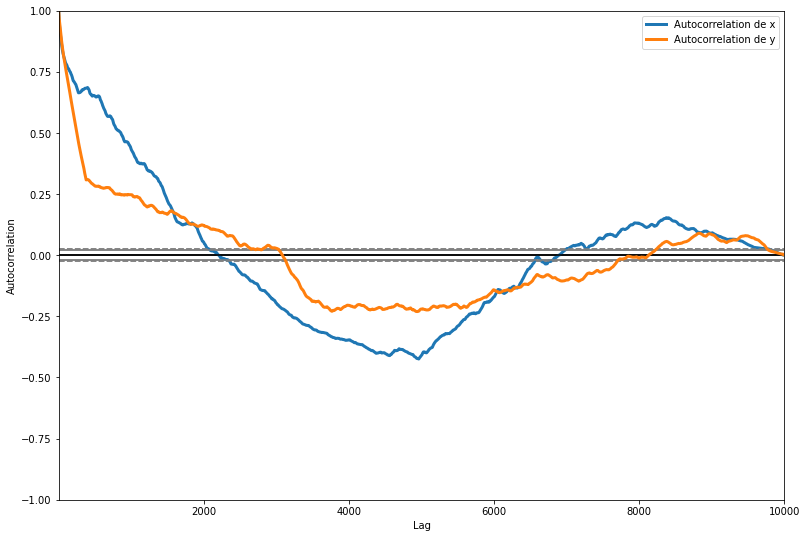

In [ ]:
#Graphique autocorrelation
plt.figure(figsize=(13,9))
pd.plotting.autocorrelation_plot(P[:,0], label='Autocorrelation de x',linewidth=3)
pd.plotting.autocorrelation_plot(P[:,1], label = 'Autocorrelation de y',linewidth=3)
plt.show()

On observe que l'algorithme ne fonctionne pas sur cette distribution multimodale. En effet, comme annoncé au début de l'exercice, nos points simulés restent coincés dans quelques "local modes" comme on peut l'observer dans la première figure; on peut déjà en déduire que nos points ne sont pas simulés aléatoirement car ils dépendent de notre x0 proposé. Ceci est confirmé par le graphique d'autocorrelation de nos points où celle-ci n'est complètement pas stable autour de 0 et ne converge pas après $10000$ itérations.

#### Question 2

In [ ]:
#The adaptative Metropolis-Hastings within Gibbs sampler pour la distribution multimodale
def adaptative_MH_multi(x0, w, mu, sigma, N, N_pi = 20):
  # Initiate the variables 
  ## Old variables 
  P = np.zeros((N,2))
  P[0,:] = x0
  a_x = 0
  a_y = 0
  l = [0, 0]
  j = 1
    
  for i in range(1,N):
    #Premiere coordonnee
    x = np.random.normal(P[i-1,0], np.exp(l[0]))
    X = np.array([x , P[i-1,1]])
        
    alpha = min(1, pi(X, w, mu, sigma, N_pi) / pi(P[i-1,:], w, mu, sigma, N_pi))
    U = np.random.rand()
        
    if U <= alpha: #On accepte
      P[i,0] = x
      a_x += 1
    else: #On rejette
      P[i,0] = P[i-1,0]          
    
    #Deuxieme coordonnee
    y = np.random.normal(P[i-1,1], np.exp(l[1]))
    Y = np.array([P[i,0], y])
        
    alpha = min(1, pi(Y, w, mu,sigma, N_pi) / pi(P[i-1,:], w, mu, sigma, N_pi))
    U = np.random.rand()

    if U <= alpha: 
      P[i,1] = y
      a_y += 1
    else: 
      P[i,1] = P[i-1,1]  
            
    #Si on est a la fin d'un batch de 50 iterations
    if (i % 50 == 0) : 
      delta_j = min(0.01, 1 / np.sqrt(j)) 
      if a_x / 50 > 0.24:
        l[0] += delta_j   
      else: 
        l[0] -= delta_j   
          
      if a_y / 50 > 0.24:
        l[1] += delta_j       
      else: 
        l[1] -= delta_j   
      j += 1
                
  return P

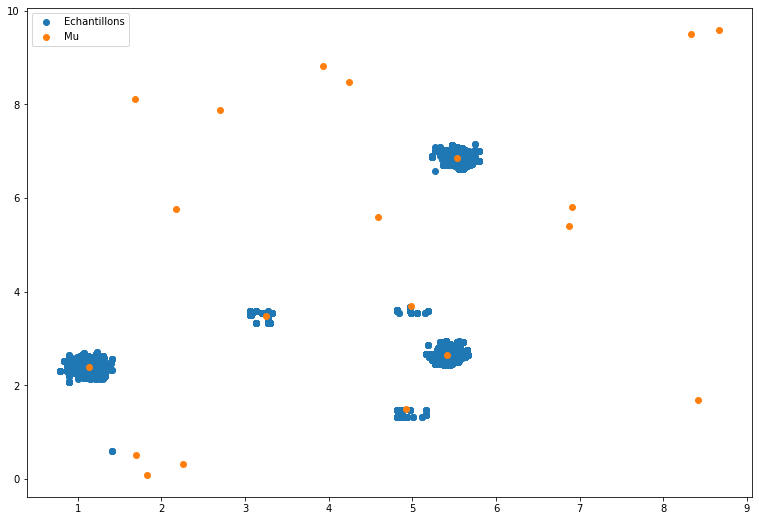

In [ ]:
N_pi = 20
w = np.ones(N_pi) * 0.05
mu = np.array([[2.18,5.76],[8.67,9.59],[4.24,8.48],[8.41,1.68],[3.93,8.82],[3.25,3.47],[1.70,0.50],[4.59,5.60],[6.91,5.81],[6.87,5.40],[5.41,2.65],[2.70,7.88],[4.98,3.70],[1.14,2.39],[8.33,9.50],[4.93,1.50],[1.83,0.09],[2.26,0.31],[5.54,6.86],[1.69,8.11]])
sigma = np.ones(N_pi) * 0.1

x0 = [1,2.5]
P = adaptative_MH_multi(x0, w, mu, sigma, N=10000)
      
plt.figure(figsize=(13,9))
plt.scatter(P[:,0],P[:,1] , label = 'Echantillons')
plt.scatter(mu[:,0],mu[:,1], label = 'Mu')
plt.legend()
plt.show()

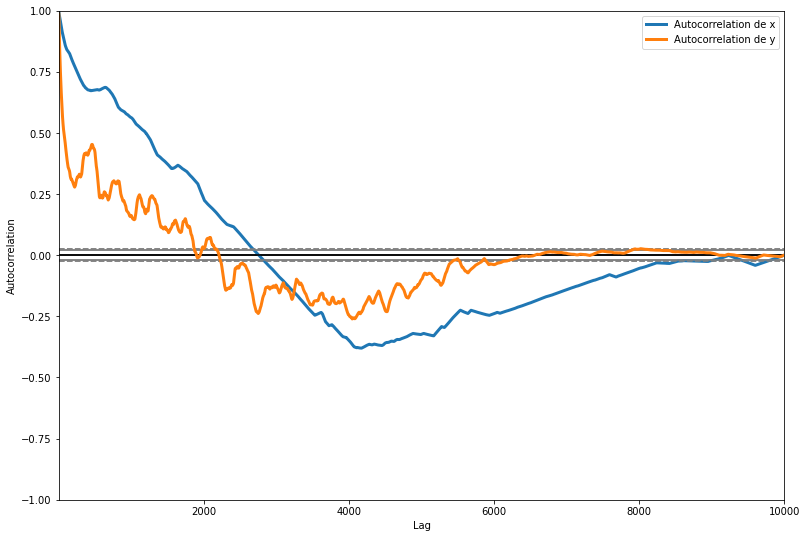

In [ ]:
#Graphique autocorrelation
plt.figure(figsize=(13,9))
pd.plotting.autocorrelation_plot(P[:,0], label='Autocorrelation de x',linewidth=3)
pd.plotting.autocorrelation_plot(P[:,1], label = 'Autocorrelation de y',linewidth=3)
plt.show()

De même avec un algorithme MCMC adaptatif, on reste toujours coincé sur certains "local modes" comme on peut l'observer sur la première figure. Cependant au niveau de l'autocorrelation de x et de y, celle-ci semble converger vers 0 après un grand nombre d'itérations mais globalement l'algorithme a échoué à générer des réalisations de notre distribution multimodale $pi$ de façon aléatoire.

### 2.B – Parallel Tempering
#### Question 1

In [ ]:
#Parallel Tempering
def PT(T, N_iter, w, mu, sigma, N_pi=20): 
  K = len(T)
  d = 2
  P = np.zeros((K,N_iter+1,d))
  
  for n in range(N_iter):
    
    #Draw Y using the transition kernel
    for i in range(K): 
      
      t = T[i]
      
      #Premiere coordonnee
      x = np.random.normal(P[i,n,0], 0.25*np.sqrt(t))
      X = np.array([x , P[i,n,1]])
      
      alpha = min(1, (pi(X, w, mu, sigma, N_pi)/pi(P[i,n,:], w, mu, sigma, N_pi))**(1 / T[i]))
      U = np.random.rand()
      
      if U <= alpha: 
        P[i,n+1,0] = x
      else: 
        P[i,n+1,0] = P[i,n,0] 
      
      #Deuxieme coordonnee
      y = np.random.normal(P[i,n,1],0.25*np.sqrt(t))
      Y = np.array([P[i,n+1,0] , y])

      alpha = min(1, (pi(Y, w, mu, sigma, N_pi)/pi(P[i,n,:], w, mu, sigma, N_pi))**(1 / T[i]))
      U = np.random.rand()

      if U <= alpha: #On accepte 
        P[i,n+1,1] = y
      else: #On rejette
        P[i,n+1,1] = P[i,n,1] 
    
    #Choix de i et j
    i = np.random.randint(0, K) 
    j = np.random.randint(0, K) 
    while np.abs(i-j) != 1:
      i = np.random.randint(0, K) 
      j = np.random.randint(0, K) 
        
    
    num = (pi(P[j,n+1,:], w, mu, sigma, N_pi)**(1/T[i])) * (pi(P[i,n+1,:], w, mu, sigma, N_pi)**(1/T[j]))
    den = (pi(P[i,n+1,:], w, mu, sigma, N_pi)**(1/T[i])) * (pi(P[j,n+1,:], w, mu, sigma, N_pi)**(1/T[j]))
    alpha_i_j = min(1, num / den)

    U = np.random.rand()
    if U <= alpha_i_j : #Si on accepte, on intervertit les coordonnee i et j
        aux = P[i,n+1,:]
        P[i,n+1,:] = P[j,n+1,:]
        P[j,n+1,:] = aux 
    #Sinon on laisse comme on a
  return P

#### Question 2

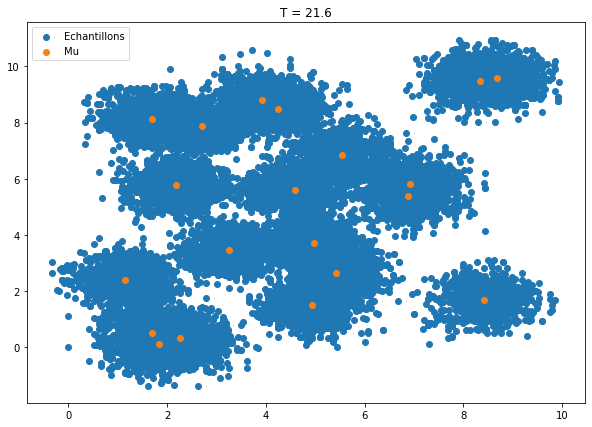

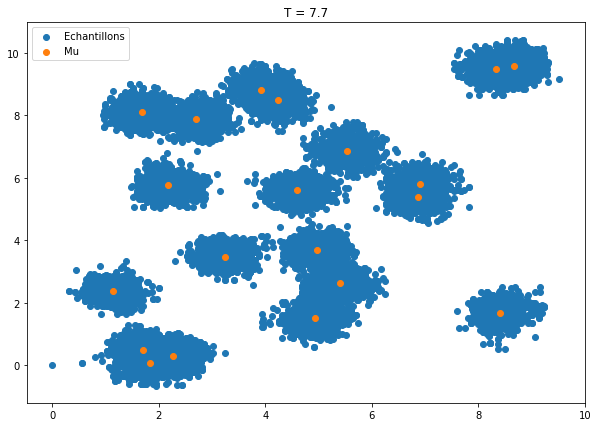

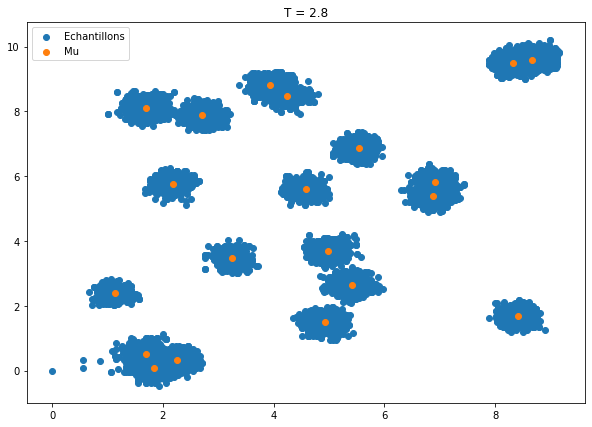

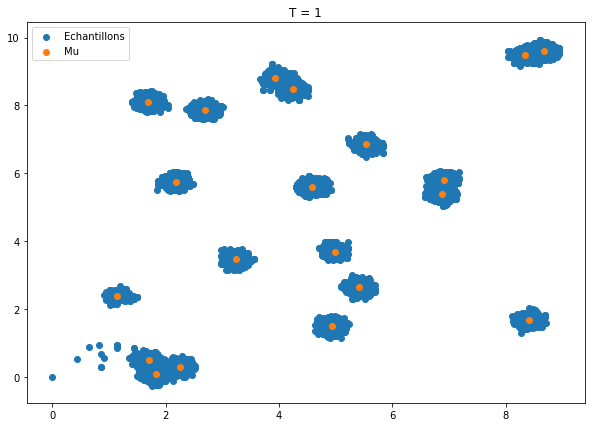

In [ ]:
T = [60,21.6,7.7,2.8,1]
N_iter = 20000
w = np.ones(20) * 0.05
mu = np.array([[2.18,5.76],[8.67,9.59],[4.24,8.48],[8.41,1.68],[3.93,8.82],[3.25,3.47],[1.70,0.50],[4.59,5.60],[6.91,5.81],[6.87,5.40],[5.41,2.65],[2.70,7.88],[4.98,3.70],[1.14,2.39],[8.33,9.50],[4.93,1.50],[1.83,0.09],[2.26,0.31],[5.54,6.86],[1.69,8.11]])
sigma = np.ones(20) * 0.1

P = PT(T, N_iter, w, mu, sigma)

#On genere un graphique pour chaque temperature utilisee
for i in range(len(T)): 
  plt.figure(figsize=(10,7))
  plt.scatter(P[i,:,0], P[i,:,1] , label = 'Echantillons')
  plt.scatter(mu[:,0],mu[:,1], label = 'Mu')
  plt.legend()
  plt.title('T = ' + str(T[i]))
  plt.show()

On observe que "the Parallel Tempering algorithm" est performant dans la simulation de distribution multimodale. En effet, on remarque que les échantillons sont bien répartis parmis tous les modes : on ne reste pas bloqué comme précèdemment sur certains modes.
On remarque que plus la température utilisée est basse, plus les points simulés vont être proche des différents centres.

## Exercice 3 : Adaptive Metropolis-Hastings within Gibbs sampler

#### Question 1

Réponse sur feuille.

#### Question 2

Preuve résultats théoriques sur feuille.

In [ ]:
#Simuler loi gamma inverse comme indique dans l'enonce
def invG(a, b):
  return 1 / np.random.gamma(shape=a, scale=1/b)

def gibbs(Y, X0, mu0, sigma0, tau0, alpha, beta, gamma, N, k, N_iter): 
  X_tab = []
  X = X0

  mu_tab = []
  mu = mu0 

  sigma_tab = []
  sigma = sigma0

  tau_tab = []
  tau = tau0
  
  for m in range(N_iter):
    X_new = np.zeros(N)
    mu_new = np.random.normal(np.mean(X), np.sqrt(sigma / N))
    sigma_new = invG(alpha + N/2, beta + np.sum((X - mu)**2)/2)
    tau_new = invG(gamma + N*k/2, beta + np.sum((Y.T - X)**2)/2)  

    for i in range(N): 
      mean = (tau * mu + sigma * np.sum(Y[i,:])) / (k * sigma + tau)
      var = np.sqrt((sigma * tau) / (k * sigma + tau))
      X_new[i] = np.random.normal(loc=mean, scale=var) 
    
    mu_tab.append(mu_new)
    X_tab.append(X_new)      
    sigma_tab.append(sigma_new)
    tau_tab.append(tau_new)

    #Mise a jour des parametres
    X = X_new       
    mu = mu_new
    sigma = sigma_new
    tau = tau_new
  
  return X_tab, mu_tab, sigma_tab, tau_tab

#### Question 3

Preuve résultats théoriques sur feuille.

In [ ]:
def block_Gibbs(Y, X0, mu0, sigma0, tau0, alpha, beta, gamma, N, k, N_iter):
  X_tab = []
  X = X0

  mu_tab = []
  mu = mu0 

  sigma_tab = []
  sigma = sigma0

  tau_tab = []
  tau = tau0

  s_y = np.apply_along_axis(np.sum, 1, Y)
  s_y = np.append(s_y, 0.)

  for i in range(N_iter):
    sigma_new = invG(alpha + N/2, beta + np.sum((X - mu)**2)/2)
    tau_new = invG(gamma + N*k/2, beta + np.sum((Y.T - X)**2)/2)

    cov_inv = np.diag([(sigma_new*k + tau_new)/(tau_new*sigma_new)]*N + [-N/sigma_new])
    cov_inv[:][N] = -1 / sigma_new
    cov_inv[N][:] = -1 / sigma_new
    cov = np.linalg.inv(cov_inv)

    mean = np.dot(cov, s_y / tau_new)
    X_mu = np.random.multivariate_normal(mean, cov, 1).reshape(N+1)

    X_new = X_mu[:N]
    mu_new = X_mu[N]

    X_tab.append(X_new)
    mu_tab.append(mu_new)
    sigma_tab.append(sigma_new)
    tau_tab.append(tau_new)

  return X_tab, mu_tab, sigma_tab, tau_tab

#### Question 4


#### Question 5

In [ ]:
N = 500
k = 100

# Target values
mu = 7
sigma = 4
tau = 1

# Initial parameters
sigma0 = 5
tau0 = 2
mu0 = 6

alpha=0.1
beta=0.1
gamma=0.1
N_iter = 10000

#On genere des données synthétiques dont la loi est connue
#On prend ki=k pour tout i
Y = np.zeros((N,k))
for i in range(N):
    Xi = np.random.normal(mu, np.sqrt(sigma))
    epsiloni = np.random.normal(0, np.sqrt(tau), k)
    Y[i,:] = Xi + epsiloni



In [ ]:
#Gibbs sampler
X0 = np.zeros(N)
X, mu, sigma, tau = gibbs(Y, X0, mu0, sigma0, tau0, alpha, beta, gamma , N, k, N_iter) 

print('Approximation des parametres par Gibbs sampler :')
print('Mu :', np.mean(mu))
print('Sigma :', np.mean(sigma))
print('Tau :',np.mean(tau))

Approximation des parametres par Gibbs sampler :
Mu : 7.0919993832758275
Sigma : 4.290498278068345
Tau : 0.9957266998010342


In [ ]:
#Block gibbs sampler
X0 = np.zeros(N)
N_iter = 1000
X, mu, sigma, tau = block_Gibbs(Y, X0, mu0, sigma0, tau0, alpha, beta, gamma , N, k, N_iter) 

print('Approximation des parametres par Gibbs sampler :')
print('Mu :', np.mean(mu))
print('Sigma :', np.mean(sigma))
print('Tau :',np.mean(tau))



<ipython-input-90-693bc4c34c59>:27: RuntimeWarning: covariance is not positive-semidefinite.
  sample_X_mu = np.random.multivariate_normal(mean, cov, 1).reshape(N+1)


Approximation des parametres par Gibbs sampler :
Mu : -3493.048939765264
Sigma : 36.10718840939616
Tau : 55.582094806959915


L'algorithme Gibbs sampler est assez performant car il approxime de manière très proche nos paramètres. Cependant, pour l'algorithme  Block-Gibbs sampler, je n'ai pas réussi à l'implémenter car les approximations qui en découlent sont très mauvaises.